In [2]:
#library Classification
import pandas as pd
import string
import numpy as np
import nltk

In [3]:
#Mesin Learning Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder
#SVM
from sklearn.svm import SVC

In [4]:
#visualisasi hasil
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#memanggil dataset
filecsv='Laba.csv'
teks=pd.read_csv(filecsv, header=0, delimiter=';', encoding='utf-8')
df=pd.DataFrame(teks)
print(df)

             No Transaksi Sub Total Total Pokok Laba Kotor Laba Jual  \
0     148597/KSR/UTM/0522   Rp5.000     Rp4.083      Rp917     Rp917   
1     148598/KSR/UTM/0522  Rp63.000    Rp57.260    Rp5.740   Rp5.740   
2     148599/KSR/UTM/0522  Rp24.000    Rp19.203    Rp4.797   Rp4.797   
3     148600/KSR/UTM/0522   Rp4.000     Rp3.225      Rp775     Rp775   
4     148601/KSR/UTM/0522  Rp69.000    Rp65.410    Rp3.590   Rp3.590   
...                   ...       ...         ...        ...       ...   
2472  151098/KSR/UTM/0522   Rp3.500     Rp3.022      Rp478     Rp478   
2473  151099/KSR/UTM/0522  Rp26.000    Rp22.900    Rp3.100   Rp3.100   
2474  151100/KSR/UTM/0522   Rp3.500     Rp2.162    Rp1.338   Rp1.338   
2475  151101/KSR/UTM/0522  Rp58.000    Rp56.600    Rp1.400   Rp1.400   
2476  151102/KSR/UTM/0522   Rp6.500     Rp5.083    Rp1.417   Rp1.417   

      Perubahan Laba  
0                  0  
1                  1  
2                  0  
3                  0  
4                  1

In [6]:
#input parameter untuk prediksi class
xTarget=df.drop(['No Transaksi', 'Perubahan Laba', 'Laba Jual'], axis=1)
print(xTarget)

     Sub Total Total Pokok Laba Kotor
0      Rp5.000     Rp4.083      Rp917
1     Rp63.000    Rp57.260    Rp5.740
2     Rp24.000    Rp19.203    Rp4.797
3      Rp4.000     Rp3.225      Rp775
4     Rp69.000    Rp65.410    Rp3.590
...        ...         ...        ...
2472   Rp3.500     Rp3.022      Rp478
2473  Rp26.000    Rp22.900    Rp3.100
2474   Rp3.500     Rp2.162    Rp1.338
2475  Rp58.000    Rp56.600    Rp1.400
2476   Rp6.500     Rp5.083    Rp1.417

[2477 rows x 3 columns]


In [7]:
#target classification dari acc/rejected loan
yTarget=df['Perubahan Laba']
print(yTarget)

0       0
1       1
2       0
3       0
4       1
       ..
2472    0
2473    1
2474    0
2475    1
2476    1
Name: Perubahan Laba, Length: 2477, dtype: int64


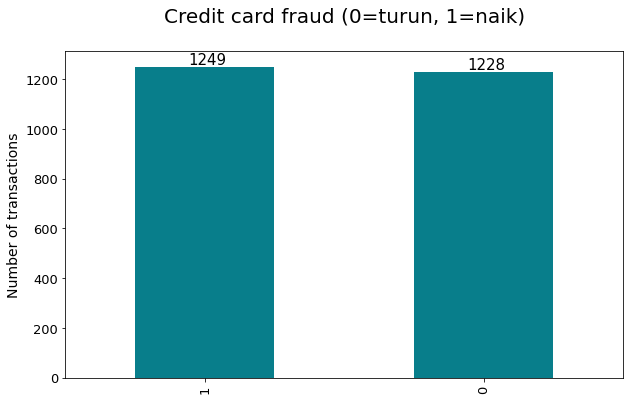

In [8]:
ax=df['Perubahan Laba'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13, color='#087E8B')
ax.set_title('Credit card fraud (0=turun, 1=naik)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height()+10, str(round(i.get_height(), 2)), fontsize=15)

In [9]:
#merubah (encode) nilai yTarget menjadi dua class yaitu 0 dan 1
encoder = LabelBinarizer()
Y = encoder.fit_transform(yTarget)
print(Y)

[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


In [10]:
#merubah (encode) nilai atribut menjadi index nilai
tfidf_transformer=OneHotEncoder()
X=tfidf_transformer.fit_transform(xTarget)
print(X)
print(X.shape)

  (0, 430)	1.0
  (0, 1728)	1.0
  (0, 3885)	1.0
  (1, 502)	1.0
  (1, 2053)	1.0
  (1, 3568)	1.0
  (2, 238)	1.0
  (2, 1077)	1.0
  (2, 3454)	1.0
  (3, 366)	1.0
  (3, 1470)	1.0
  (3, 3773)	1.0
  (4, 519)	1.0
  (4, 2137)	1.0
  (4, 3256)	1.0
  (5, 435)	1.0
  (5, 1752)	1.0
  (5, 3886)	1.0
  (6, 123)	1.0
  (6, 852)	1.0
  (6, 3049)	1.0
  (7, 392)	1.0
  (7, 1798)	1.0
  (7, 3009)	1.0
  (8, 53)	1.0
  :	:
  (2468, 2514)	1.0
  (2469, 288)	1.0
  (2469, 1347)	1.0
  (2469, 3153)	1.0
  (2470, 180)	1.0
  (2470, 669)	1.0
  (2470, 3327)	1.0
  (2471, 75)	1.0
  (2471, 767)	1.0
  (2471, 2574)	1.0
  (2472, 297)	1.0
  (2472, 1456)	1.0
  (2472, 3491)	1.0
  (2473, 259)	1.0
  (2473, 1244)	1.0
  (2473, 3171)	1.0
  (2474, 297)	1.0
  (2474, 1115)	1.0
  (2474, 2524)	1.0
  (2475, 479)	1.0
  (2475, 2043)	1.0
  (2475, 2548)	1.0
  (2476, 492)	1.0
  (2476, 1929)	1.0
  (2476, 2555)	1.0
(2477, 3912)


In [11]:
#membuat data training dan testing dari dataset dengan data test = 30%
#dari jumlah instance
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1733, 3912)
(1733, 1)
(744, 3912)
(744, 1)


In [12]:
#melakukan pembuatan model training
SuppVM = SVC(gamma='scale', decision_function_shape='ovo', kernel='linear').fit(X_train,np.ravel(y_train,order='C'))

print(SuppVM)

SVC(decision_function_shape='ovo', kernel='linear')


In [15]:
#prediksi terhadap nilai training yang telah dibuat
models = [
    SuppVM,
]
dlist = [
    'SVM',
]

i=0
print(y_test.shape)
entries = []
for model in models:
    prediction = model.predict(X_test)
    accuracies = accuracy_score(y_test, prediction)
    nameS = dlist[i]
    entries.append((nameS, model, accuracies))
    i=i+1
    
cv_df = pd.DataFrame(entries, columns=['Classifieer', 'prediction', 'accuracy'])
cv_df.to_csv('AkurasiLaba.csv')
print(cv_df)

(744, 1)
  Classifieer                                         prediction  accuracy
0         SVM  SVC(decision_function_shape='ovo', kernel='lin...  0.705645


In [16]:
cv_df = pd.DataFrame(entries, columns=['Classifieer', 'prediction', 'accuracy'])
#cv_df.to_csv('AkurasiLaba.csv')
#print(cv_df)

#Menampilkan confusion matrix
print(confusion_matrix(y_test, prediction))

print(cv_df.groupby('accuracy').accuracy.mean())

[[246 115]
 [104 279]]
accuracy
0.705645    0.705645
Name: accuracy, dtype: float64


In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[246 115]
 [104 279]]
Normalized confusion matrix
[[0.68 0.32]
 [0.27 0.73]]


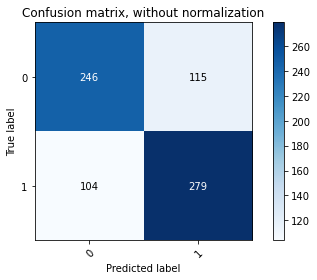

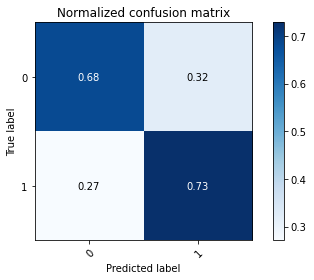

In [18]:
class_names = yTarget
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [20]:
import pickle
regressor = SVC()
#Fitting model with training data
regressor.fit(X, y)

pd.to_pickle(regressor,'model.pickle')

NameError: name 'y' is not defined